In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#PERCEPTRONS
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target==0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol = 1e-3, random_state = 42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

<ipython-input-2-9cfaab830fb2>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target==0).astype(np.int)


In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


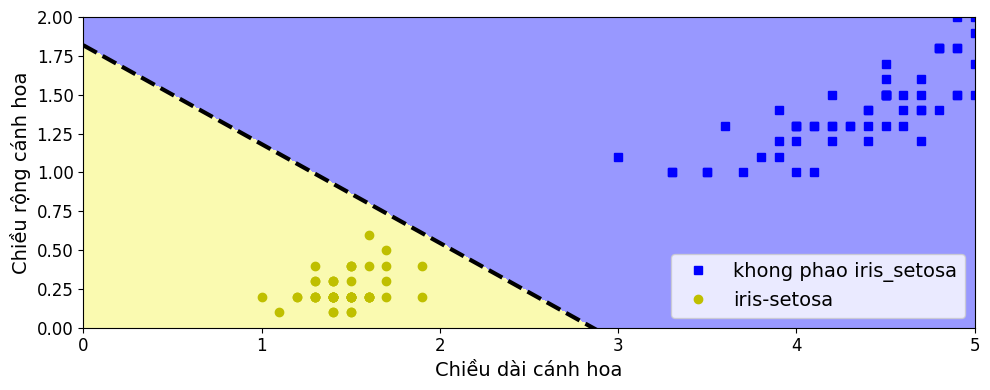

In [4]:
import numpy as np

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_/per_clf.coef_[0][1]

axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize = (10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = 'khong phao iris_setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label = 'iris-setosa')

plt.plot([axes[0], axes[1]], [a * axes[0]+b, a*axes[1]+b], 'k--', linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Chiều dài cánh hoa", fontsize=14)
plt.ylabel("Chiều rộng cánh hoa", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [5]:
# ham kich hoat
def sigmoid(z):
  return 1/(1 + np.exp(-z))
def relu(z):
  return np.maximum(0, z)
def derivative(f, z, eps = 0.000001):
  return (f(z + eps) - f(z - eps)) / (2 * eps)

Saving figure activation_functions_plot


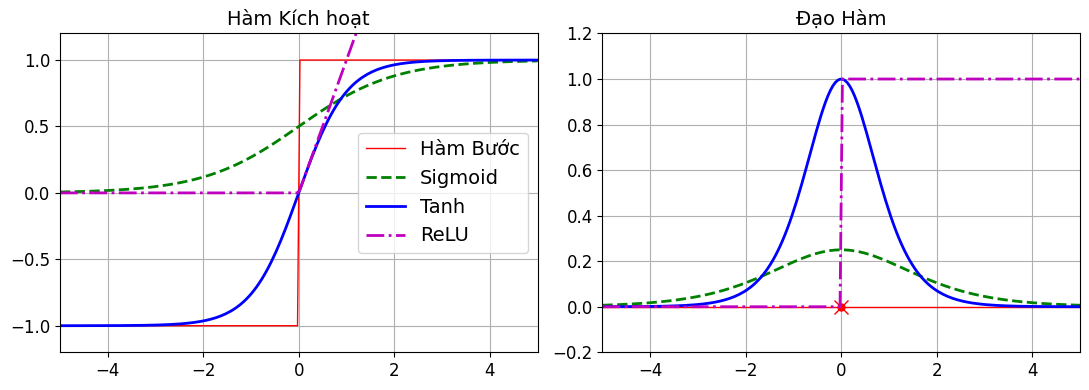

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Hàm Bước")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Hàm Kích hoạt", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Hàm Bước")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Đạo Hàm", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
# xay dung mo hinh phan loai anh
import tensorflow as tf
from tensorflow import keras

In [8]:
tf.__version__

'2.12.0'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000: ] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

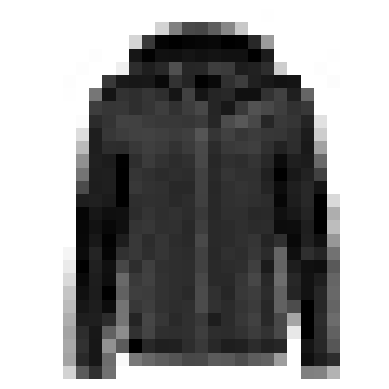

In [13]:
plt.imshow(X_train[0], cmap = 'binary')
plt.axis('off')
plt.show()

In [14]:
y_train.shape
print(y_train)

[4 0 7 ... 3 0 5]


In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

In [17]:
X_valid.shape

(5000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


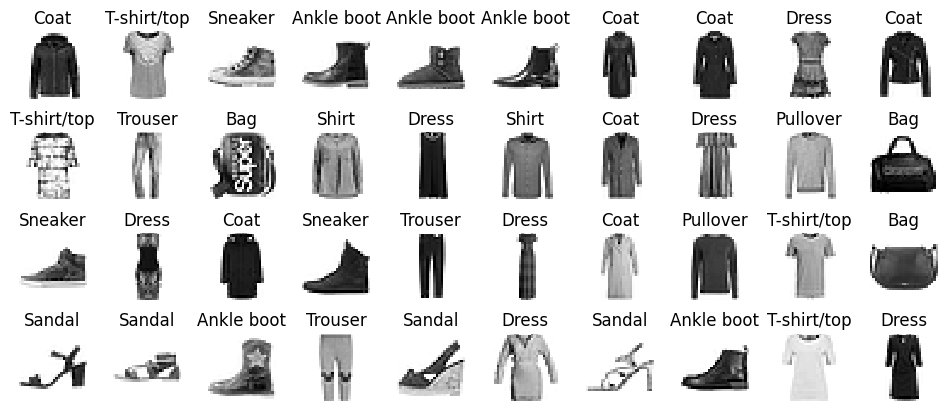

In [19]:

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap = 'binary', interpolation = 'nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize =12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [20]:
# mang noron than kinh
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [23]:
model.layers

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


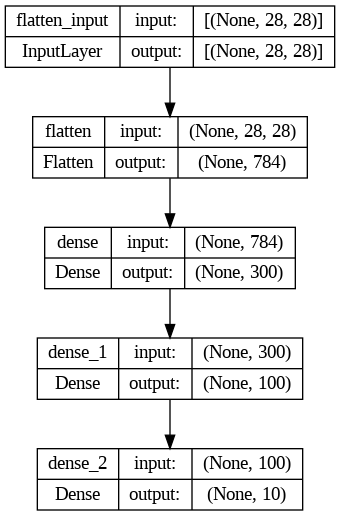

In [25]:
keras.utils.plot_model(model, 'my_fashion_mnist_model.png', show_shapes  =True)

In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer(hidden1.name) is hidden1

True

In [28]:
weights, biases = hidden1.get_weights()

In [29]:
weights

array([[-0.05106029, -0.05179262, -0.04060906, ...,  0.01281739,
        -0.03201106,  0.04615861],
       [ 0.06131618,  0.05286834, -0.04629678, ...,  0.03007183,
        -0.01220446, -0.03390342],
       [-0.01368913, -0.06020508, -0.05503645, ..., -0.00280526,
         0.01193662, -0.0526351 ],
       ...,
       [ 0.03422794,  0.04886296,  0.04548039, ..., -0.01665325,
         0.01695998, -0.05782021],
       [-0.01131384, -0.04886091, -0.06865633, ..., -0.01943976,
        -0.00451547, -0.00147556],
       [ 0.04261386,  0.02995767, -0.06758289, ...,  0.04361075,
        -0.0472855 ,  0.00330678]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

In [33]:
from keras.utils.sidecar_evaluator import optimizer
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7333 - accuracy: 0.7564 - val_loss: 0.5176 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4923 - accuracy: 0.8281 - val_loss: 0.4363 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4442 - accuracy: 0.8436 - val_loss: 0.5282 - val_accuracy: 0.8038
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4167 - accuracy: 0.8553 - val_loss: 0.3922 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3973 - accuracy: 0.8610 - val_loss: 0.3751 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3788 - accuracy: 0.8674 - val_loss: 0.3761 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3661 - accuracy: 0.8712 - val_loss: 0.3696 - val_accuracy

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [36]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curve_plot


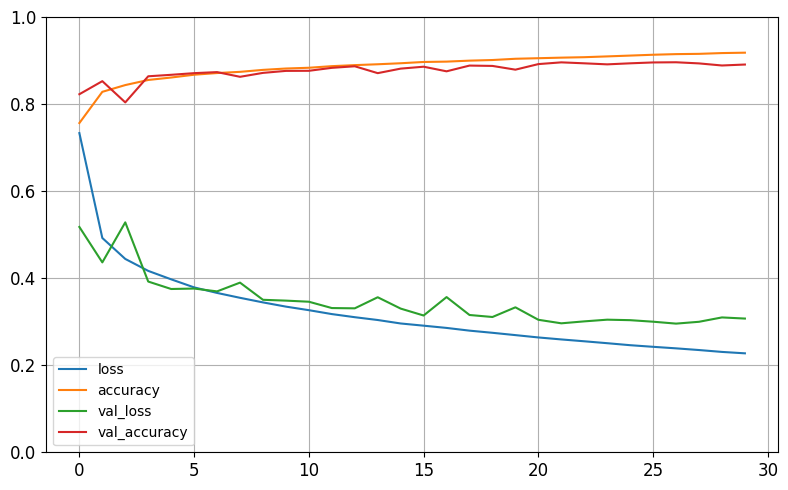

In [38]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig('keras_learning_curve_plot')
plt.show()

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8801


[0.3412458300590515, 0.8801000118255615]

In [40]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 84ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
y_pred = np.argmax(model.predict(X_new), axis = -1)
y_pred

1/1 [==============================] - 0s 19ms/step


array([9, 2, 1])

In [42]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [43]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


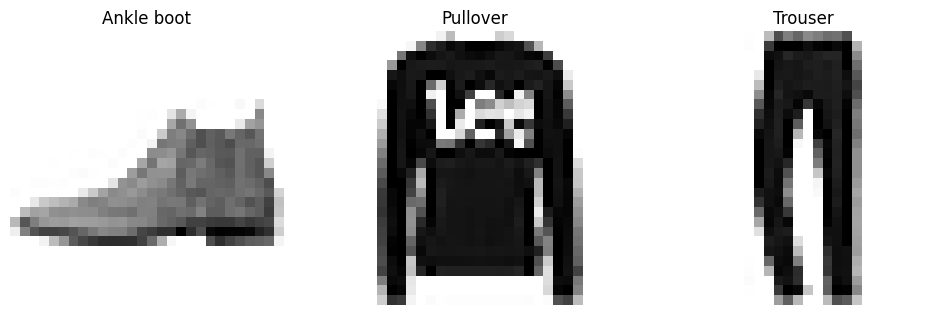

In [44]:
plt.figure(figsize = (12, 8))
for index, image in enumerate(X_new):
  plt.subplot(1, 3, index+1)
  plt.imshow(image, cmap = 'binary', interpolation ='nearest')
  plt.axis('off')
  plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout = False)
plt.show()

In [45]:
# MLP HOI QUY
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate = 1e-3))
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 1.9058 - val_loss: 0.8977
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8133 - val_loss: 0.7637
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7358 - val_loss: 0.7168
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6931 - val_loss: 0.6837
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6606 - val_loss: 0.6552
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6334 - val_loss: 0.6317
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6095 - val_loss: 0.6106
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5890 - val_loss: 0.5935
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5723 - val_loss: 0.5794
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5587 - val_loss: 0.5671

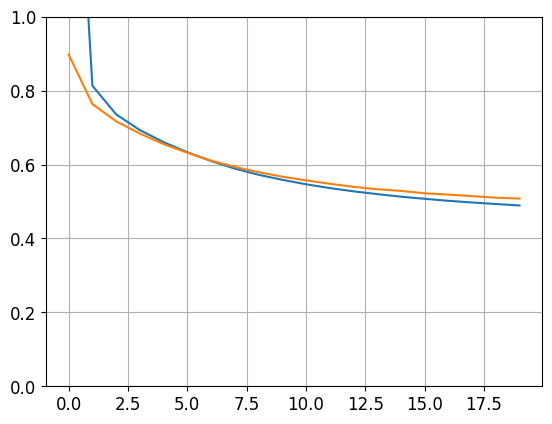

In [48]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [49]:
y_pred

array([[0.78407127],
       [1.5651281 ],
       [2.6622992 ]], dtype=float32)

In [50]:
#FUNCTION API
np.random.seed(42)
tf.random.set_seed(42)


In [51]:
# mang noron rong va sau
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs = [output])

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [53]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.SGD(learning_rate = 1e-3))
history = model.fit(X_train, y_train, epochs = 20,
                    validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.1944 - val_loss: 0.7640
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6532 - val_loss: 0.6298
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6086 - val_loss: 0.6019
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5691 - val_loss: 0.5880
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5635 - val_loss: 0.5686
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5390 - val_loss: 0.5564
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5277 - val_loss: 0.5464
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5180 - val_loss: 0.5384
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5114 - val_loss: 0.5306
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5040 - val_loss: 0.5247

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
# dau vao da nhanh
input_A = keras.layers.Input(shape=[5], name = 'wide_input')
input_B = keras.layers.Input(shape = [6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output= keras.layers.Dense(1, name='output')(concat)
model=keras.models.Model(inputs = [input_A, input_B], outputs=[output])

In [56]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate = 1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B  = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs = 20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred =model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.3292 - val_loss: 0.9145
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8020 - val_loss: 0.6924
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6685 - val_loss: 0.6298
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6168 - val_loss: 0.5965
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5844 - val_loss: 0.5707
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5599 - val_loss: 0.5534
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5418 - val_loss: 0.5381
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5273 - val_loss: 0.5282
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5164 - val_loss: 0.5198
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5083 - val_loss: 0.5144

In [57]:
# mang noron co 2 output
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape = [6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden2)
model = keras.models.Model(inputs = [input_A, input_B],
                           outputs=[output, aux_output])

In [58]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [59]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train],epochs = 20,
    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 2.7498 - main_output_loss: 2.4286 - aux_output_loss: 5.6410 - val_loss: 1.4172 - val_main_output_loss: 1.0950 - val_aux_output_loss: 4.3174
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 1.1360 - main_output_loss: 0.8881 - aux_output_loss: 3.3665 - val_loss: 0.9545 - val_main_output_loss: 0.7548 - val_aux_output_loss: 2.7516
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8645 - main_output_loss: 0.7089 - aux_output_loss: 2.2648 - val_loss: 0.8129 - val_main_output_loss: 0.6765 - val_aux_output_loss: 2.0402
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7653 - main_output_loss: 0.6540 - aux_output_loss: 1.7668 - val_loss: 0.7461 - val_main_output_loss: 0.6409 - val_aux_output_loss: 1.6936
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7125 - main_output_loss: 0.6225 - aux_output_loss: 1.5232 - val_loss

In [60]:
total_loss, main_loss, aux_loss, = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
Y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 1s 4ms/step - loss: 0.5344 - main_output_loss: 0.4887 - aux_output_loss: 0.9458


1/1 [==============================] - 0s 87ms/step


In [61]:
#  XAY DUNG MO HINH DONG
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [62]:
model.compile(loss = 'mse', loss_weights = [0.9, 0.1], optimizer = keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs = 10,
                    validation_data = ((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 2.4208 - output_1_loss: 2.2693 - output_2_loss: 3.7844 - val_loss: 1.3592 - val_output_1_loss: 1.1503 - val_output_2_loss: 3.2396
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 1.1584 - output_1_loss: 0.9902 - output_2_loss: 2.6720 - val_loss: 1.0146 - val_output_1_loss: 0.8529 - val_output_2_loss: 2.4704
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.9307 - output_1_loss: 0.8002 - output_2_loss: 2.1053 - val_loss: 0.8744 - val_output_1_loss: 0.7445 - val_output_2_loss: 2.0433
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.8200 - output_1_loss: 0.7114 - output_2_loss: 1.7973 - val_loss: 0.7970 - val_output_1_loss: 0.6872 - val_output_2_loss: 1.7859
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7564 - output_1_loss: 0.6608 - output_2_loss: 1.6165 - val_loss: 0.7435 - val_output_1_loss: 0.6446 - val_ou

1/1 [==============================] - 0s 62ms/step


In [63]:
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=[8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [65]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate = 1e-3))
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 1.7391 - val_loss: 0.8787
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7689 - val_loss: 0.7085
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6933 - val_loss: 0.6701
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6556 - val_loss: 0.6430
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6287 - val_loss: 0.6199
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6050 - val_loss: 0.6017
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5845 - val_loss: 0.5836
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5662 - val_loss: 0.5678
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5501 - val_loss: 0.5547
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.5318


In [66]:
model.save('my_keras_model.h5')

In [67]:
model = keras.models.load_model('my_keras_model.h5')

In [68]:
model.save_weights('my_keras_weights.ckpt')

In [69]:
model.load_weights('my_keras_weights.ckpt')

In [70]:
#  SU DUNG CALLBACK DE HUAN LUYEN MO HINH
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [72]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate  =1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras.model.h5', save_best_only = True)
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5')
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.6462 - val_loss: 1.1585
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.9865 - val_loss: 0.7908
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7447 - val_loss: 0.6950
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6705 - val_loss: 0.6516
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6308 - val_loss: 0.6188
Epoch 6/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6005 - val_loss: 0.5928
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5761 - val_loss: 0.5715
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5554 - val_loss: 0.5537
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5380 - val_loss: 0.5386
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.5318


In [74]:
# dung som viec huan luyen mo hinh bang cach su dung early_stopping
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate = 1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 3s 5ms/step - loss: 0.5235 - val_loss: 0.5323
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5125 - val_loss: 0.5217
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5030 - val_loss: 0.5141
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4949 - val_loss: 0.5079
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4876 - val_loss: 0.5010
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4807 - val_loss: 0.4968
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4751 - val_loss: 0.4911
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4694 - val_loss: 0.4863
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4643 - val_loss: 0.4826
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4601 - val_lo

In [75]:
class PrinValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [76]:
val_train_ration_cb = PrinValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs = 1,
                    validation_data = (X_valid, y_valid),
                    callbacks = [val_train_ration_cb])

349/363 [===========================>..] - ETA: 0s - loss: 0.3500
val/train: 1.11
363/363 [==============================] - 1s 4ms/step - loss: 0.3494 - val_loss: 0.3878


In [77]:
# su dung tensorboard de truc quan hoa
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

In [78]:
def get_run_logdir():
  import time
  run_id  =time.strftime('run_%Y_%m_%d-%H_%M_%S')
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_08_30-14_59_12'

In [79]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape=[8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [81]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 1.9943 - val_loss: 1.0650
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.8637 - val_loss: 0.7645
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.7248 - val_loss: 0.7042
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6725 - val_loss: 0.6685
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6377 - val_loss: 0.6381
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6095 - val_loss: 0.6145
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5867 - val_loss: 0.5940
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5671 - val_loss: 0.5767
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5508 - val_loss: 0.5622
Epoch 10/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5371 - val_loss: 0.5492

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port= 081327

In [93]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [94]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-94-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [95]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.3562 - val_loss: 0.7819
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7135 - val_loss: 0.6102
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5756 - val_loss: 0.5484
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5188 - val_loss: 0.5242
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4958 - val_loss: 0.5059
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4818 - val_loss: 0.4997
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4735 - val_loss: 0.4886
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4659 - val_loss: 0.4838
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4603 - val_loss: 0.4785
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4563 - val_lo

In [96]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.3525


In [97]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 49ms/step


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
242/242 [==============================] - 2s 5ms/step - loss: 0.7719 - val_loss: 0.5490
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 0.5129 - val_loss: 0.5010
Epoch 3/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4659 - val_loss: 0.4674
Epoch 4/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4506 - val_loss: 0.4572
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 0.4371 - val_loss: 0.4555
Epoch 6/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4278 - val_loss: 0.4409
Epoch 7/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4208 - val_loss: 0.4409
Epoch 8/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4181 - val_loss: 0.4358
Epoch 9/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4138 - val_loss: 0.4291
Epoch 10/10
121/121 [==================

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [            nan -4.27589436e-01 -3.90527298e-01 -4.87983416e-01
 -6.42467101e-01 -9.97829854e-01 -6.65108442e+19 -5.65665106e-01
 -4.17462081e-01             nan]
  warnings.warn(


363/363 [==============================] - 2s 4ms/step - loss: 0.7944 - val_loss: 0.7288
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5335 - val_loss: 0.6126
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7127 - val_loss: 0.4594
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4292 - val_loss: 0.4442
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4089 - val_loss: 0.4381
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3980 - val_loss: 0.4151
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3904 - val_loss: 0.4088
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3839 - val_loss: 0.4822
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3935 - val_loss: 0.4017
Epoch 10/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3748 - val_loss: 0.3995


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7ceaa093a800>,
                   param_distributions={'learning_rate': [0.005206191456156762,
                                                          0.003991231786051613,
                                                          0.001475577925915313,
                                                          0.0012808559702195826,
                                                          0.010491478792478297,
                                                          0.000446653227204257,
                                                          0.0008926678082307462,
                                                          0.00875021488452691,
                                                          0.003747679319241924,
                                                          0.0005408759509716155...
                                                          0.0014244508390947963,
                                                          0.0012431362807668583,
                                                          0.023506784731656585,
                                                          0.025812710479461962,
                                                          0.0006968706009018391,
                                                          0.0003320408946215249,
                                                          0.008262992033507683,
                                                          0.0020563693515982507,
                                                          0.000451649719549589,
                                                          0.006992451550047427, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 66, 'n_hidden': 1, 'learning_rate': 0.01136169032380562}